# Pristine GRAPE calculation of control fields for cnot implementation

Robert Johansson (robert@riken.jp)

In [53]:
#%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [54]:
from qutip import *
from qutip.control import *

In [55]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [56]:
U = sigmax()
R = 500
H_ops = [sigmay()]
H_labels = [r'$u_{y}$']

$U = \sigma_{x} $   
$H_{ops} = [\sigma_{y} ] $


In [57]:
omega_1 = 0.5
H0 =  omega_1 * sigmaz()

c_ops = []

# GRAPE

In [58]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [59]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [60]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [61]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  49.07s. Est. time left: 00:00:07:21
20.0%. Run time:  95.91s. Est. time left: 00:00:06:23
30.0%. Run time: 143.31s. Est. time left: 00:00:05:34
40.0%. Run time: 187.24s. Est. time left: 00:00:04:40
50.0%. Run time: 231.66s. Est. time left: 00:00:03:51
60.0%. Run time: 282.40s. Est. time left: 00:00:03:08
70.0%. Run time: 326.79s. Est. time left: 00:00:02:20
80.0%. Run time: 373.40s. Est. time left: 00:00:01:33
90.0%. Run time: 419.94s. Est. time left: 00:00:00:46
Total run time: 462.18s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

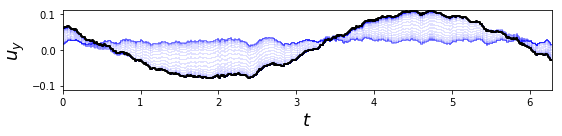

In [62]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [63]:
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [64]:
result.U_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-1.62145823e-16+6.46184495e-17j -1.00533131e-15-1.00000000e+00j]
 [ 6.16204872e-16-1.00000000e+00j -2.01576901e-17-4.98299318e-16j]]

In [65]:
result.U_f/1j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0. -1.]
 [-1.  0.]]

In [86]:
result.U_f/-1j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a276330b8>)

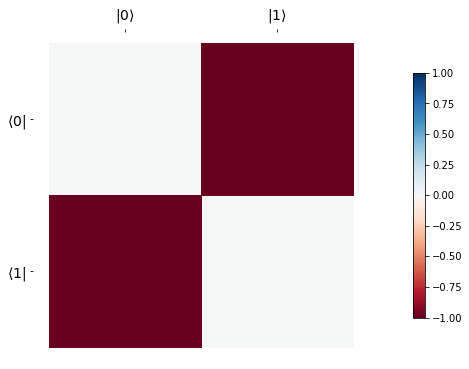

In [66]:
hinton(result.U_f/1j)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a27637470>)

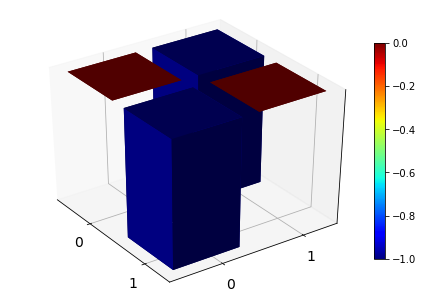

In [67]:
matrix_histogram(result.U_f/1j)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a27628208>)

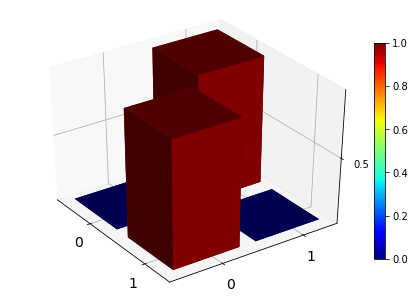

In [68]:
matrix_histogram(sigmax())

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a2522d9b0>)

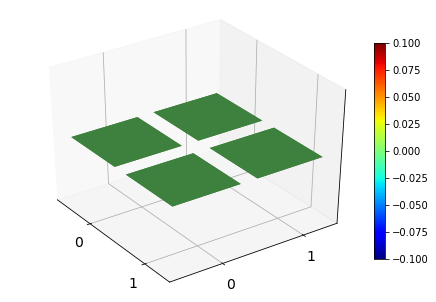

In [69]:
matrix_histogram(sigmay())

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a257d84e0>)

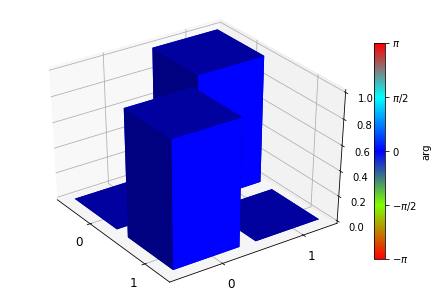

In [87]:
matrix_histogram_complex(sigmax())

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a2578a278>)

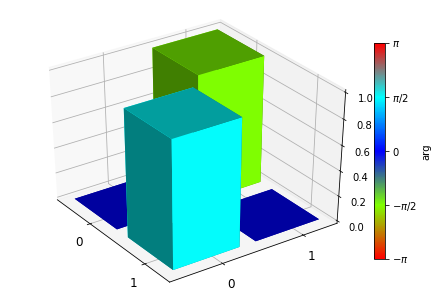

In [88]:
matrix_histogram_complex(sigmay())

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a25698ba8>)

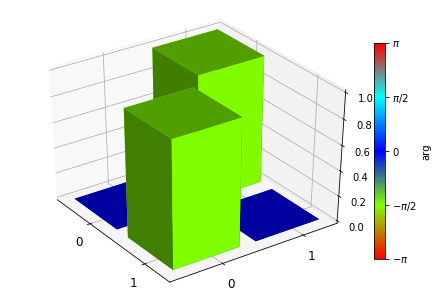

In [90]:
matrix_histogram_complex(result.U_f)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a251d6da0>)

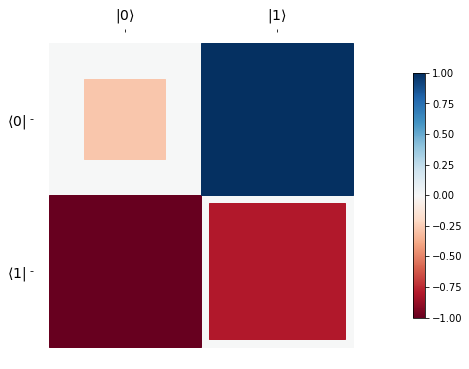

In [70]:
hinton(result.U_f)

In [71]:
result.H_t[0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

In [72]:
result.H_t[1]

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]],
 array([ 0.38511686,  0.38442148,  0.39275303,  0.40115232,  0.39649268,
         0.41574604,  0.41395366,  0.40635067,  0.38284348,  0.3888108 ,
         0.37371825,  0.37037283,  0.36480854,  0.34632219,  0.36509262,
         0.33991403,  0.32135253,  0.30336916,  0.28700874,  0.27556253,
         0.24835722,  0.23426707,  0.2195098 ,  0.22475359,  0.19057054,
         0.18103855,  0.17757064,  0.17921704,  0.16890662,  0.15437647,
         0.16121939,  0.16812897,  0.1495097 ,  0.12542849,  0.12857134,
         0.13755411,  0.10752286,  0.09949379,  0.08975488,  0.09564878,
         0.0912678 ,  0.07557294,  0.08646685,  0.10217823,  0.08116575,
         0.07346642,  0.07135633,  0.07148809,  0.06366621,  0.03270066,
         0.01696613,  0.00694548, -0.01308909, -0.02802769, -0.01748787,
        -0.04919147, -0.05655473, -0.05697821, -0.05308851, -0.0379

In [73]:
result.u

array([[[ 0.10413736,  0.111138  ,  0.12720867, ...,  0.13416851,
          0.10552649,  0.10365282]],

       [[ 0.10429197,  0.1112791 ,  0.12733624, ...,  0.1340139 ,
          0.1053584 ,  0.1053584 ]],

       [[ 0.10451244,  0.11148031,  0.12751815, ...,  0.13379344,
          0.10511871,  0.10511871]],

       ...,

       [[ 0.38511686,  0.38442148,  0.39275303, ..., -0.14681133,
         -0.1831045 , -0.1831045 ]],

       [[ 0.38511686,  0.38442148,  0.39275303, ..., -0.14681133,
         -0.1831045 , -0.1831045 ]],

       [[ 0.38511686,  0.38442148,  0.39275303, ..., -0.14681133,
         -0.1831045 , -0.1831045 ]]])

In [74]:
result.U_f/result.U_f[0,0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j -2.12094556e+15+5.32204759e+15j]
 [-2.12094556e+15+5.32204759e+15j -9.49585541e-01+2.69472605e+00j]]

In [75]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

(0.0, 0.9999999999999969)

## Test numerical integration of GRAPE pulse

In [76]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.68035559+0.58082503j  0.44694297+0.00073326j]
 [-0.44694297+0.00073326j -0.68035559-0.58082503j]]

In [77]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j         -0.3794533 -0.32502008j]
 [ 0.38051771+0.32377326j  0.15686019+0.98762082j]]

In [78]:
U_f_numerical / 1j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.58082503+0.68035559j  0.00073326-0.44694297j]
 [ 0.00073326+0.44694297j -0.58082503+0.68035559j]]

In [79]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(-0.000733259243672059, 5.3766911843052e-07)

# Process tomography

## Ideal cnot gate

In [80]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] 
op_label = [["i", "x", "y", "z"]] 

In [81]:
U_i_s = to_super(U)
chi = qpt(U_i_s, op_basis)

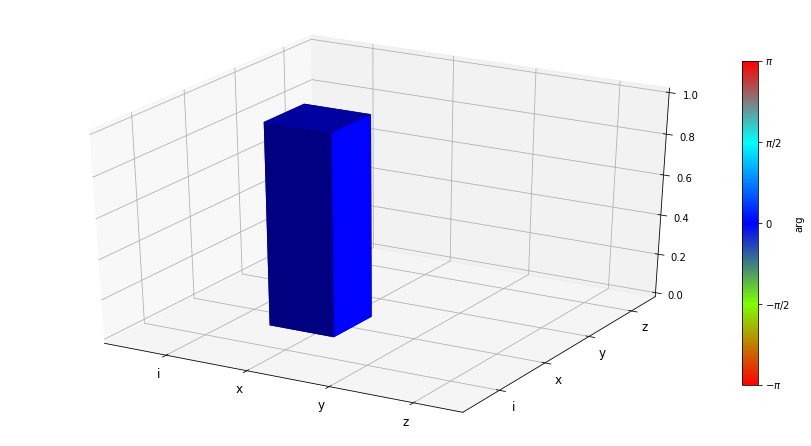

In [82]:
fig = plt.figure(figsize=(12,6))
fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

In [83]:
U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

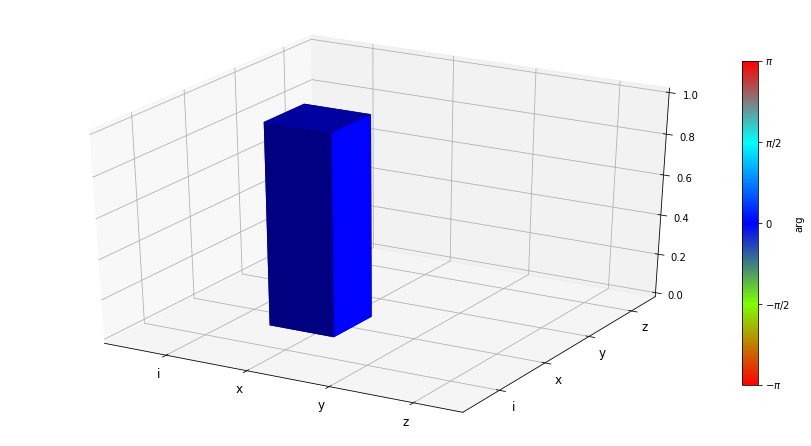

In [84]:
fig = plt.figure(figsize=(12,6))
fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [85]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.14.3
SciPy,1.1.0
matplotlib,3.0.2
Cython,0.28.1
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.3.1
Python,"3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]"
OS,posix [darwin]
